In [121]:
import pandas as pd
import numpy as np

#Glossary
df = pd.read_excel('C:\\Users\\santi\\OneDrive\\Desktop\\SAPS_2016_Glossary.xlsx')
df.head()

,Themes,Tables Within Themes,Column Names,Description of Field,Equivalent SAPS2011 Variable (if name changed),Points to Note
0,"Theme 1: Sex, Age and Marital Status",Table 1,T1_1AGE0M,Age 0 - Males,NaN,NaN
1,NaN,"Population aged 0 - 19 by sex and year of age,...",T1_1AGE1M,Age 1 - Males,NaN,NaN
2,NaN,NaN,T1_1AGE2M,Age 2 - Males,NaN,NaN
3,NaN,NaN,T1_1AGE3M,Age 3 - Males,NaN,NaN
4,NaN,NaN,T1_1AGE4M,Age 4 - Males,NaN,NaN


In [122]:
df['Themes'] = df['Themes'].ffill()
df.head()

,Themes,Tables Within Themes,Column Names,Description of Field,Equivalent SAPS2011 Variable (if name changed),Points to Note
0,"Theme 1: Sex, Age and Marital Status",Table 1,T1_1AGE0M,Age 0 - Males,NaN,NaN
1,"Theme 1: Sex, Age and Marital Status","Population aged 0 - 19 by sex and year of age,...",T1_1AGE1M,Age 1 - Males,NaN,NaN
2,"Theme 1: Sex, Age and Marital Status",NaN,T1_1AGE2M,Age 2 - Males,NaN,NaN
3,"Theme 1: Sex, Age and Marital Status",NaN,T1_1AGE3M,Age 3 - Males,NaN,NaN
4,"Theme 1: Sex, Age and Marital Status",NaN,T1_1AGE4M,Age 4 - Males,NaN,NaN


In [123]:
df['Themes'].unique()

array(['Theme 1: Sex, Age and Marital Status ',
       'Theme 2: Migration, Ethnicity, Religion and Foreign Languages',
       'Theme 3: Irish Language ', 'Theme 4: Families ',
       'Theme 5: Private Households ', 'Theme 6: Housing ',
       'Theme 7: Communal Establishments ', 'Theme 8: Principal Status ',
       'Theme 9: Social Class and Socio-Economic Group ',
       'Theme 10: Education ', 'Theme 11: Commuting ',
       'Theme 12: Disability, Carers and General Health ',
       'Theme 13: Occupations', 'Theme 14: Industries ',
       'Theme 15: Motor Car Availability, PC Ownership and Internet Access'],
      dtype=object)

In [124]:
Glossary = df[(df['Themes']=='Theme 5: Private Households ')|  (df['Themes']== 'Theme 6: Housing ')]
Glossary.shape

(148, 6)

#### Importing actual dataset

In [125]:
Census = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\SAPS2016_DC2013.csv',encoding='iso-8859-1')
Census.shape

(40, 802)

In [126]:
Glossary.columns

Index(['Themes', 'Tables Within Themes', 'Column Names',
       'Description of Field',
       'Equivalent SAPS2011 Variable (if name changed)', 'Points to Note'],
      dtype='object')

In [127]:
Glossary['Column Names']

306     T5_1OP_H
307     T5_1MC_H
308     T5_1CC_H
309    T5_1MCC_H
310    T5_1CCC_H
         ...    
449       T6_8_O
450      T6_8_TA
451     T6_8_UHH
452     T6_8_OVD
453       T6_8_T
Name: Column Names, Length: 148, dtype: object

In [128]:
Census.columns

Index(['GUID', 'GEOGID', 'GEOGDESC', 'T1_1AGE0M', 'T1_1AGE1M', 'T1_1AGE2M',
       'T1_1AGE3M', 'T1_1AGE4M', 'T1_1AGE5M', 'T1_1AGE6M',
       ...
       'T15_1_TC', 'T15_2_Y', 'T15_2_N', 'T15_2_NS', 'T15_2_T', 'T15_3_B',
       'T15_3_OTH', 'T15_3_N', 'T15_3_NS', 'T15_3_T'],
      dtype='object', length=802)

In [129]:
ID = Census[['GUID', 'GEOGID', 'GEOGDESC']]
Census = Census.drop(['GUID', 'GEOGID', 'GEOGDESC'], axis=1)

In [130]:
Census_test = Census.filter(items=Glossary['Column Names'])

In [131]:
Census = pd.concat([Census_test,ID], axis=1)
Census.head()

,T5_1OP_H,T5_1MC_H,T5_1CC_H,T5_1MCC_H,T5_1CCC_H,T5_1OPFC_H,T5_1OPMC_H,T5_1CO_H,T5_1CCO_H,T5_1OPFCO_H,...,T6_7_NS,T6_7_T,T6_8_O,T6_8_TA,T6_8_UHH,T6_8_OVD,T6_8_T,GUID,GEOGID,GEOGDESC
0,"12,102","8,456","1,928","17,908","2,475",836,"4,825",527,"1,005",108,...,"1,878","53,633","53,850","1,329",812,"4,664","60,655",AA601F40-12B7-41E8-A384-74688CC75084,DC2013_01,Carlow-Kilkenny
1,"10,567","6,741","1,265","15,218","1,829",720,"3,785",388,808,86,...,"1,745","43,668","43,816","1,138",761,"6,424","52,139",AC869BFE-5EB7-4479-AF27-670D394B2656,DC2013_02,Cavan-Monaghan
2,"10,760","6,876","1,418","13,261","1,631",658,"3,452",334,579,87,...,"1,564","41,320","41,618","1,172","4,817","6,006","53,613",3D7FB62A-AF60-4D22-A873-542ACE8EA01D,DC2013_03,Clare
3,"9,978","6,497","1,668","15,001","2,048",665,"3,952",429,741,73,...,"1,691","43,172","43,376","1,237","1,121","4,350","50,084",48BFAC96-2DFF-4372-B216-A46EA183E87E,DC2013_04,Cork East
4,"11,224","6,116","1,934","12,542","1,563",620,"4,170",509,745,65,...,"2,535","44,992","45,415","1,226",67,"3,424","50,132",CD9AB3FF-8A12-4F77-96D4-5F4EF76E07CC,DC2013_05,Cork North-Central


Comparing average household size between Ireland and scotland

In [132]:
Ireland_avg_house = Census[['T5_2_1PH',
'T5_2_2PH',
'T5_2_3PH',
'T5_2_4PH',
'T5_2_5PH',
'T5_2_6PH',
'T5_2_7PH',
'T5_2_GE8PH',
'T5_2_TH' ]]
Ireland_avg_house.head()


,T5_2_1PH,T5_2_2PH,T5_2_3PH,T5_2_4PH,T5_2_5PH,T5_2_6PH,T5_2_7PH,T5_2_GE8PH,T5_2_TH
0,"12,102","15,312","9,541","9,379","5,099","1,750",429,200,"53,812"
1,"10,567","11,730","7,189","7,203","4,599","1,793",471,262,"43,814"
2,"10,760","11,836","6,736","6,613","3,763","1,293",308,131,"41,440"
3,"9,978","11,776","7,672","7,886","4,261","1,308",286,108,"43,275"
4,"11,224","13,171","7,886","7,344","3,730","1,269",302,146,"45,072"


In [133]:

for x in Ireland_avg_house.columns:
    try:
        Ireland_avg_house[x] = Ireland_avg_house[x].str.replace(',','')
        Ireland_avg_house[x] = pd.to_numeric(Ireland_avg_house[x])
    except:
        print('column not str')
        
Ireland_avg_house['Average household size'] = (Ireland_avg_house['T5_2_1PH']*1 + 
                                               Ireland_avg_house['T5_2_2PH']*2 + 
                                               Ireland_avg_house['T5_2_3PH']*3 + 
                                               Ireland_avg_house['T5_2_4PH']*4 + 
                                               Ireland_avg_house['T5_2_5PH']*5 + 
                                               Ireland_avg_house['T5_2_6PH']*6 + 
                                               Ireland_avg_house['T5_2_7PH']*7 +
                                               Ireland_avg_house['T5_2_GE8PH']*8) / Ireland_avg_house['T5_2_TH'] 
Ireland_avg_house.head()


column not str
column not str


C:\Users\santi\AppData\Local\Temp\ipykernel_11676\1303354070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ireland_avg_house[x] = Ireland_avg_house[x].str.replace(',','')
C:\Users\santi\AppData\Local\Temp\ipykernel_11676\1303354070.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ireland_avg_house[x] = pd.to_numeric(Ireland_avg_house[x])
C:\Users\santi\AppData\Local\Temp\ipykernel_11676\1303354070.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,T5_2_1PH,T5_2_2PH,T5_2_3PH,T5_2_4PH,T5_2_5PH,T5_2_6PH,T5_2_7PH,T5_2_GE8PH,T5_2_TH,Average household size
0,12102,15312,9541,9379,5099,1750,429,200,53812,2.777503
1,10567,11730,7189,7203,4599,1793,471,262,43814,2.819921
2,10760,11836,6736,6613,3763,1293,308,131,41440,2.675410
3,9978,11776,7672,7886,4261,1308,286,108,43275,2.775482
4,11224,13171,7886,7344,3730,1269,302,146,45072,2.665646


In [134]:
Ireland_avg_house.shape

(40, 10)

Scotland Census

https://www.nrscotland.gov.uk/statistics-and-data/statistics/statistics-by-theme/households/household-estimates/2021

In [135]:
scotland = pd.read_excel('C:\\Users\\santi\\OneDrive\\Desktop\\house-est-21-data.xlsx', sheet_name='Table3')
scotland.head()

,"Table 3: Average household size for Scotland by council area, June 2001 to 2021 [note 5] [note 6]",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,This worksheet contains one table. Some cells ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mid-year population estimates for 2021 were no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Back to contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Council,2001.00,2002.00,2003.00,2004.00,2005.00,2006.0,2007.00,2008.00,2009.00,...,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00,2021.00,Change 2020 - 2021 \n %,Change 2011 - 2021 \n %,Change 2001 - 2021 \n %
4,Scotland,2.27,2.25,2.23,2.22,2.21,2.2,2.19,2.18,2.18,...,2.17,2.17,2.16,2.15,2.15,2.14,2.12,-0.934579,-3.196347,-6.60793


In [136]:
scotland = scotland.iloc[3:]
scotland = scotland.rename(columns=scotland.iloc[0])
scotland = scotland.iloc[2:]
scotland.head()

,Council,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,Change 2020 - 2021 \n %,Change 2011 - 2021 \n %,Change 2001 - 2021 \n %
5,Aberdeen City [note 4],2.13,2.10,2.08,2.05,2.04,2.02,2.01,2.01,2.03,...,2.10,2.07,2.06,2.03,2.03,2.02,2.02,0,-2.415459,-5.164319
6,Aberdeenshire,2.47,2.45,2.44,2.42,2.41,2.41,2.41,2.40,2.40,...,2.37,2.35,2.34,2.33,2.31,2.29,2.27,-0.873362,-5.020921,-8.097166
7,Angus,2.27,2.26,2.24,2.24,2.24,2.23,2.23,2.23,2.21,...,2.17,2.16,2.14,2.12,2.11,2.10,2.08,-0.952381,-6.306306,-8.370044
8,Argyll and Bute,2.24,2.23,2.20,2.19,2.16,2.17,2.17,2.15,2.15,...,2.06,2.06,2.04,2.01,2.00,1.98,1.96,-1.010101,-8.411215,-12.5
9,City of Edinburgh [note 4],2.14,2.11,2.09,2.07,2.06,2.05,2.04,2.03,2.04,...,2.11,2.13,2.13,2.13,2.14,2.14,2.12,-0.934579,2.415459,-0.934579


In [137]:
scotland[2016.00].describe()

count    32.000000
mean      2.180625
std       0.102136
min       2.050000
25%       2.105000
50%       2.155000
75%       2.240000
max       2.420000
Name: 2016.0, dtype: float64

In [138]:
Ireland_avg_house['Average household size'].describe()

count    40.000000
mean      2.754412
std       0.185192
min       2.236814
25%       2.674458
50%       2.730714
75%       2.840331
max       3.100291
Name: Average household size, dtype: float64

[Text(0.5, 0, 'Ireland'), Text(0, 0.5, 'Average Household size')]

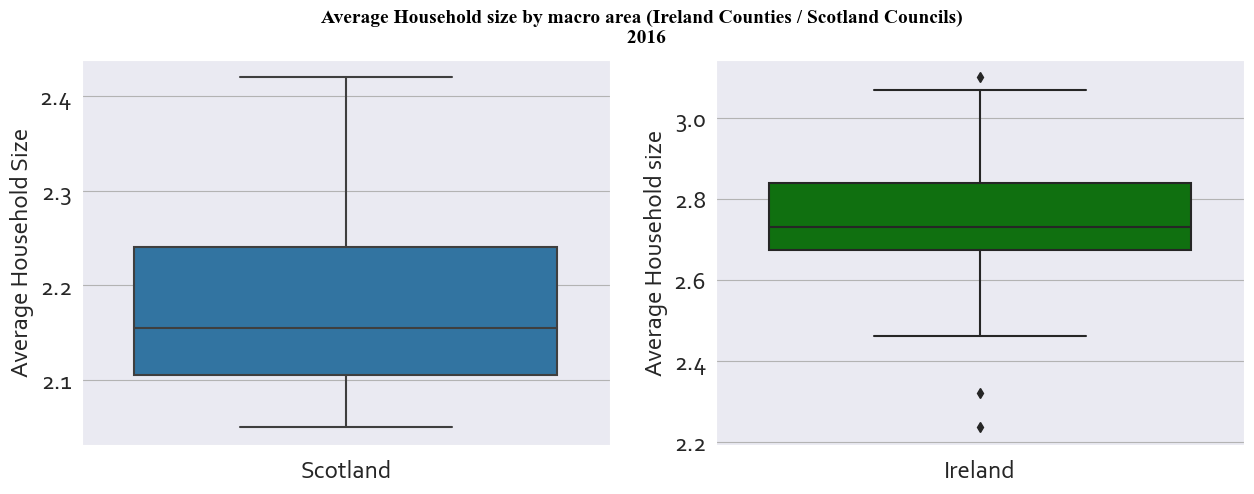

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
rc = {'figure.figsize':(10,5),
      'axes.grid' : True,
      'grid.color': '.7',
      'font.family':'Corbel',
      'font.size' : 18}
plt.rcParams.update(rc)


fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Average Household size by macro area (Ireland Counties / Scotland Councils) \n 2016',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)
sns.boxplot(y= 2016.00,data=scotland,ax=ax[0]).set(
    xlabel='Scotland', 
    ylabel='Average Household Size')
sns.boxplot(y= 'Average household size',data=Ireland_avg_house,ax=ax[1], color='green').set(
    xlabel='Ireland', 
    ylabel='Average Household size')

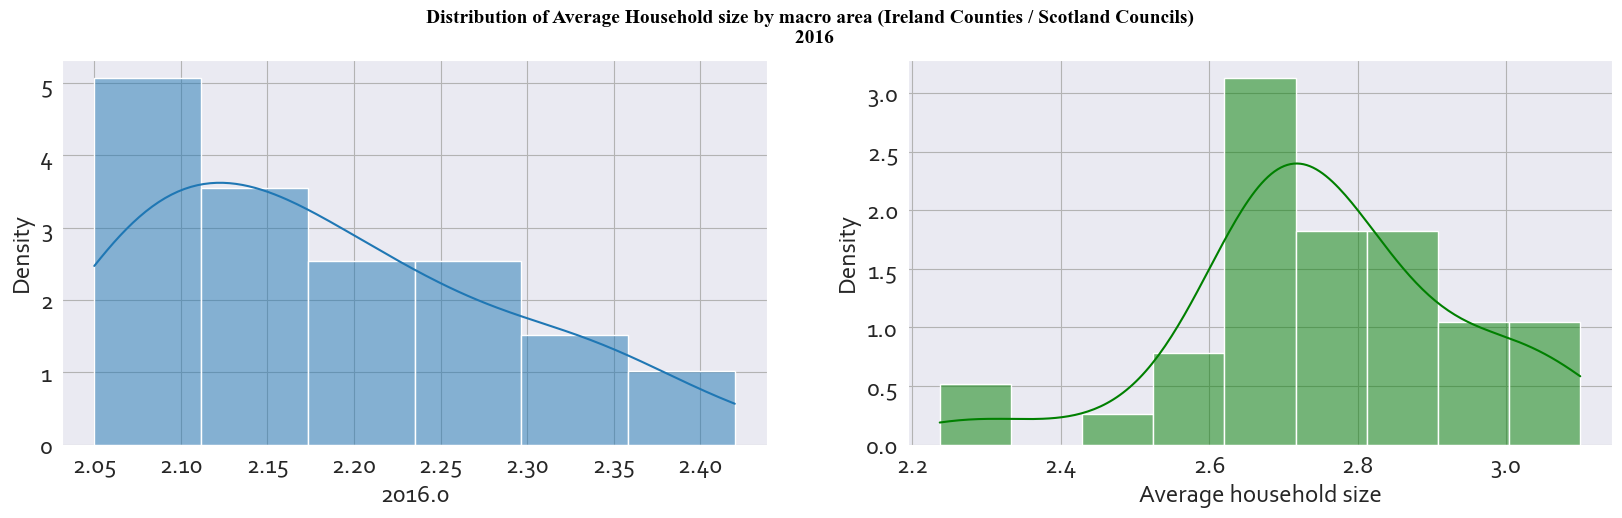

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Distribution of Average Household size by macro area (Ireland Counties / Scotland Councils) \n 2016',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)

sns.histplot(x= scotland[2016.00], kde=True, stat='density', ax=axes[0])
sns.histplot(x= Ireland_avg_house['Average household size'], kde=True, stat='density', ax=axes[1],color='green')


plt.show()

#### Checking for normality a= 0.05

Text(0.5, 1.0, 'Ireland')

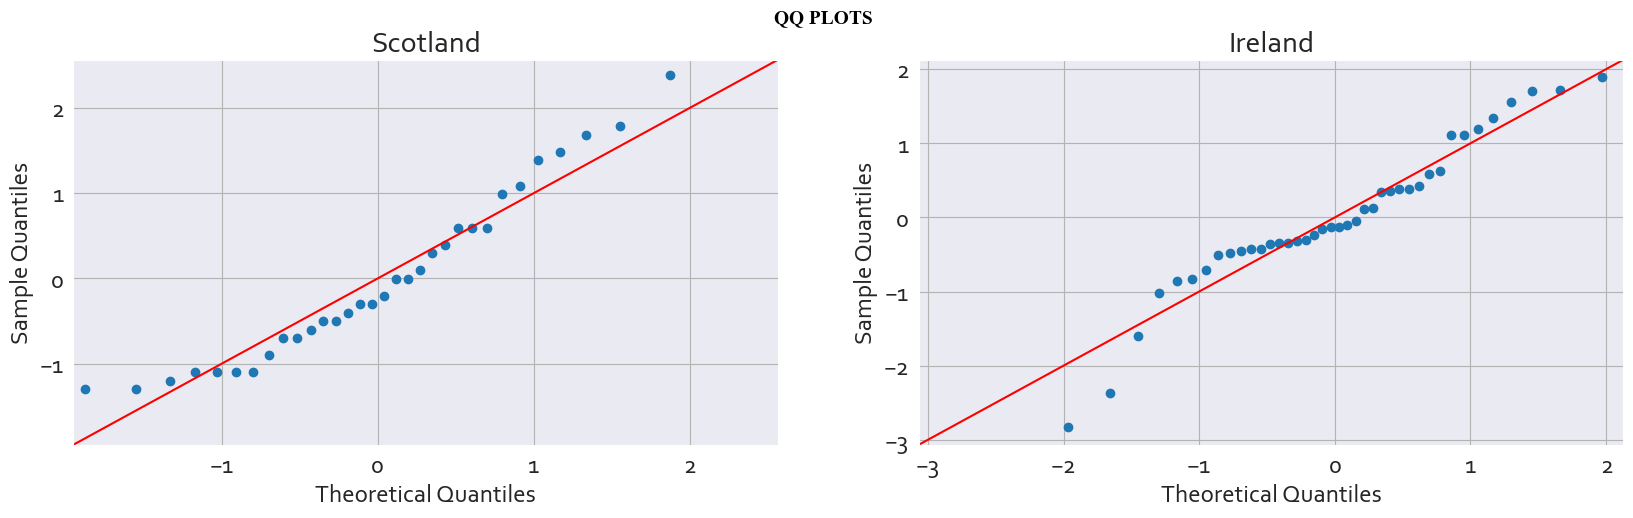

In [141]:
import statsmodels.api as sm

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('QQ PLOTS',color= "black", weight='bold',fontname="Times New Roman",fontsize=14)

fig = sm.qqplot(scotland[2016.00], line='45' ,fit = True, ax=ax[0])
ax[0].set_title('Scotland')
fig = sm.qqplot(Ireland_avg_house['Average household size'],fit = True, line='45' , ax=ax[1])
ax[1].set_title('Ireland')

In [142]:
from scipy.stats import shapiro
stat, p = shapiro(Ireland_avg_house['Average household size'])
print('Ireland p value: ' + str(p))
print('Ireland stat value: ' + str(stat))

stat, p = shapiro(scotland[2016.00])
print('Ireland p value: ' + str(p))
print('Ireland stat value: ' + str(stat))

Ireland p value: 0.07477682083845139
Ireland stat value: 0.9498233795166016
Ireland p value: 0.054151393473148346
Ireland stat value: 0.9350242018699646


both p values are greater than 0.05, data is considered normal

#### Levene test

In [143]:
from scipy.stats import levene
stat, p = levene(Ireland_avg_house['Average household size'], scotland[2016.00])
print( f'Levene test p: {p}')

Levene test p: 0.03858459942228186


there is a Significant difference between the variances so we're going for non parametric test

H0: median of averages scotland = median of averages Ireland

H1: median of averages people per household is different between ireland and scotland

In [144]:
from scipy import stats
stats.mannwhitneyu(Ireland_avg_house['Average household size'],scotland[2016.00])

MannwhitneyuResult(statistic=1266.0, pvalue=1.3456151330532647e-12)

We reject H0: there's a significanctly difference between the average people in household per macro region between Ireland and Scotland

## Tims Serie analysis

In [145]:
Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv',encoding= 'unicode_escape' )
Data.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_11676\4218614081.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv',encoding= 'unicode_escape' )


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


dataset is here:  https://www.propertypriceregister.ie/

In [146]:
Data.isna().sum()

Date of Sale (dd/mm/yyyy)         0
Address                           0
County                            0
Eircode                      504949
Price ()                         0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    543712
dtype: int64

In [147]:
Data = Data.drop_duplicates()
Data.shape

(595678, 9)

In [148]:
Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv', encoding='unicode_escape')
Data_1 = Data.groupby(['Date of Sale (dd/mm/yyyy)', 'County'])['Address'].agg('count').reset_index()
Data_1['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(Data_1['Date of Sale (dd/mm/yyyy)'])
Data_1 = Data_1.sort_values(by='Date of Sale (dd/mm/yyyy)')
Data_1 = Data_1.pivot_table(index='Date of Sale (dd/mm/yyyy)', columns='County', values='Address')
Data_1 = Data_1.fillna(0)
Data_1['total'] = Data_1.sum(axis=1)
Data_Horizontal = Data_1
Data_Horizontal.head()

C:\Users\santi\AppData\Local\Temp\ipykernel_11676\4291516210.py:1: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('C:\\Users\\santi\\OneDrive\\Desktop\\PPR-ALL.csv', encoding='unicode_escape')
C:\Users\santi\AppData\Local\Temp\ipykernel_11676\4291516210.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Data_1['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(Data_1['Date of Sale (dd/mm/yyyy)'])


County,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,Kilkenny,...,Monaghan,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow,total
Date of Sale (dd/mm/yyyy),,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2010-01-02,0.0,0.0,1.0,7.0,2.0,21.0,3.0,1.0,3.0,3.0,...,1.0,2.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,57.0
2010-01-03,0.0,0.0,0.0,11.0,2.0,24.0,3.0,2.0,2.0,2.0,...,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,3.0,70.0
2010-01-04,1.0,1.0,1.0,13.0,4.0,47.0,9.0,3.0,6.0,2.0,...,1.0,1.0,0.0,3.0,3.0,3.0,5.0,3.0,3.0,123.0
2010-01-05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [149]:
Data_vertical =  Data_Horizontal.melt(var_name='county', value_name='# property', ignore_index = False)
Data_vertical.head()

,county,# property
Date of Sale (dd/mm/yyyy),,
2010-01-01,Carlow,0.0
2010-01-02,Carlow,0.0
2010-01-03,Carlow,0.0
2010-01-04,Carlow,1.0
2010-01-05,Carlow,0.0


In [150]:
Total = Data_vertical.reset_index()
Total = Total[Total['county']=='total']
Total.head()

,Date of Sale (dd/mm/yyyy),county,# property
119730,2010-01-01,total,1.0
119731,2010-01-02,total,57.0
119732,2010-01-03,total,70.0
119733,2010-01-04,total,123.0
119734,2010-01-05,total,2.0


In [151]:
Total.info()
_date = '2023-01-01'
Total = Total[Total['Date of Sale (dd/mm/yyyy)'] < _date]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4605 entries, 119730 to 124334
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date of Sale (dd/mm/yyyy)  4605 non-null   datetime64[ns]
 1   county                     4605 non-null   object        
 2   # property                 4605 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 143.9+ KB


<AxesSubplot:xlabel='Date of Sale (dd/mm/yyyy)', ylabel='# property'>

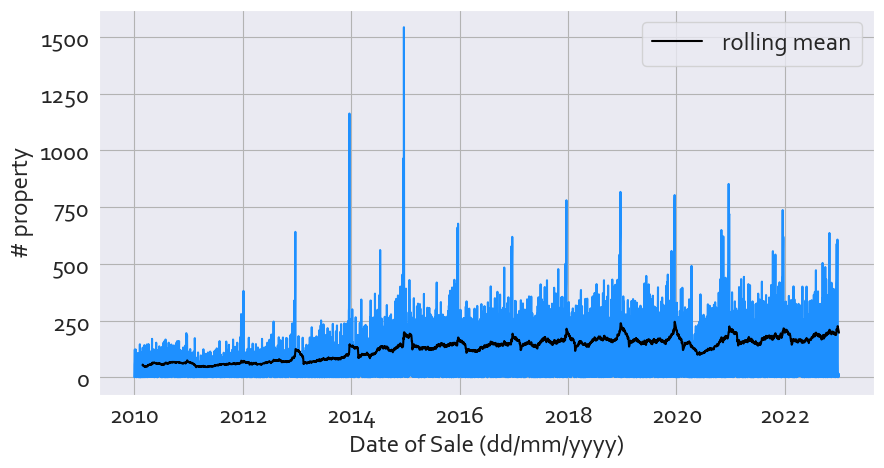

In [152]:
rolling_window= 5
sns.lineplot(x=Total['Date of Sale (dd/mm/yyyy)'], y=Total['# property'], color='dodgerblue')
sns.lineplot(x=Total['Date of Sale (dd/mm/yyyy)'], y=Total['# property'].rolling(52).mean(),  color='black', label='rolling mean')

In [153]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(Total['# property'].values)
print(result)


(-4.929160459066553, 3.0591830326641223e-05, 32, 4461, {'1%': -3.4318167264794774, '5%': -2.862188117266657, '10%': -2.567114996565668}, 54394.873465119425)


H0 : time serie is stationary

H1 : time serie is not stationary

p = 0.05

In the results, we can see that the p-value obtained from the test is less than 0.05 so we are going to reject the null hypothesis “Time series is stationary”, that means the time series is non-stationary.

Since data needs to be stationary: log transformation

In [154]:
Total['_property_log'] = np.log(abs(Total['# property']))

## Feature engineering

In [155]:
Total['year'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).year
Total['month'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).month
Total['day'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).day
Total['day_of_year'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).dayofyear
Total['week_of_year'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).weekofyear
Total['quarter'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).quarter
Total.head(1)

C:\Users\santi\AppData\Local\Temp\ipykernel_11676\3025751641.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  Total['week_of_year'] = pd.DatetimeIndex(Total['Date of Sale (dd/mm/yyyy)']).weekofyear


,Date of Sale (dd/mm/yyyy),county,# property,_property_log,year,month,day,day_of_year,week_of_year,quarter
119730,2010-01-01,total,1.0,0.0,2010,1,1,1,53,1


sin and cos on month??

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomp = seasonal_decompose(Total['_property_log'], period=52, model='additive', extrapolate_trend='freq')
Total["property trend"] = decomp.trend
Total["property seasonal"] = decomp.seasonal

In [157]:
Total.head()

,Date of Sale (dd/mm/yyyy),county,# property,_property_log,year,month,day,day_of_year,week_of_year,quarter,property trend,property seasonal
119730,2010-01-01,total,1.0,0.000000,2010,1,1,1,53,1,2.875679,0.220300
119731,2010-01-02,total,57.0,4.043051,2010,1,2,2,53,1,2.881243,-0.070937
119732,2010-01-03,total,70.0,4.248495,2010,1,3,3,53,1,2.886808,-0.041414
119733,2010-01-04,total,123.0,4.812184,2010,1,4,4,1,1,2.892373,-0.101676
119734,2010-01-05,total,2.0,0.693147,2010,1,5,5,1,1,2.897938,0.382727


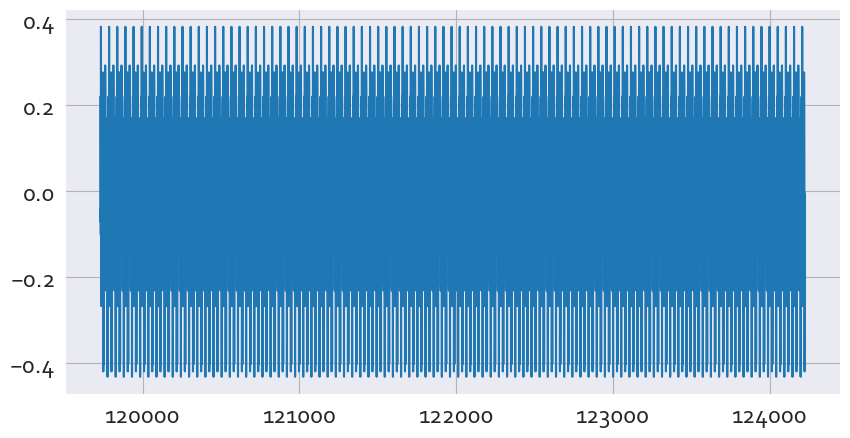

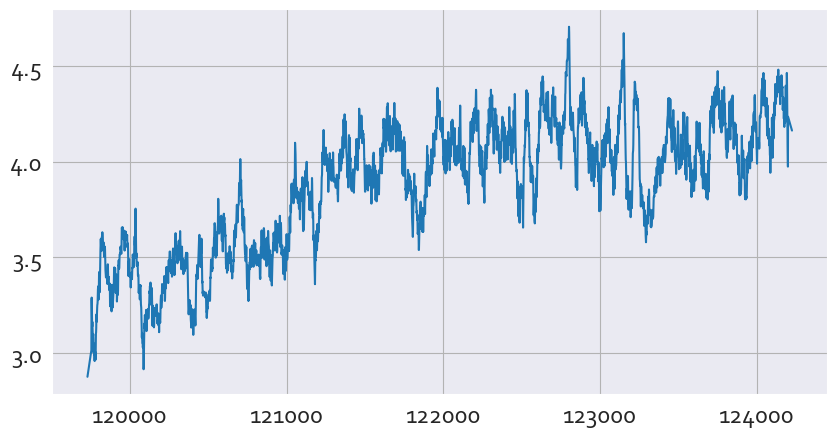

In [158]:
Total['property seasonal'].plot()
plt.show()
Total['property trend'].plot()
plt.show()


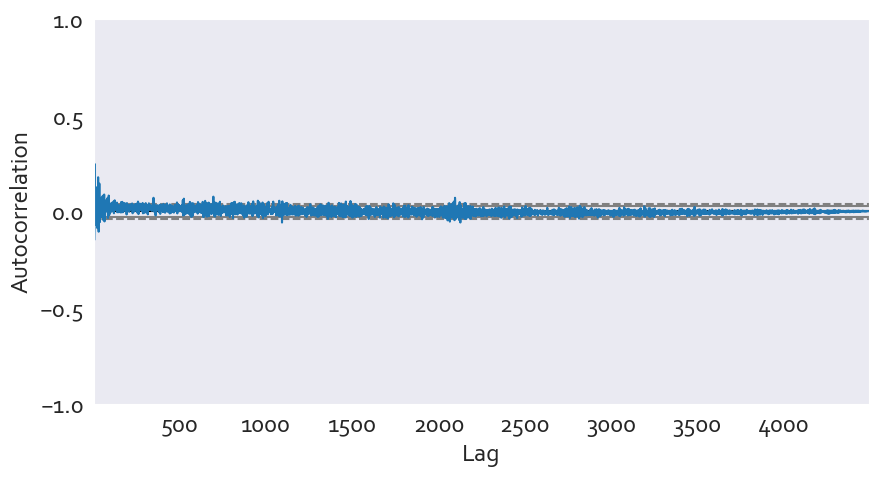

In [160]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Total['_property_log'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(Total['_property_log'], lags=100, ax=ax[0])
plot_pacf(Total['_property_log'], lags=100, ax=ax[1])
plt.show()

In [168]:
#CV

from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 5

X = Total['Date of Sale (dd/mm/yyyy)']
y = Total['_property_log']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [172]:
train_size = int(0.85 * len(Total))
test_size = len(Total) - train_size

univariate_df = Total[['Date of Sale (dd/mm/yyyy)', '_property_log']].copy()

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])


In [178]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(3)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

#print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

c:\Users\santi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\santi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\santi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\santi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: Expected sequence or array-like, got <class 'float'>

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(Total, WINDOW_SIZE)
X1.shape, y1.shape

((4489, 5, 1, 10), (4489, 10))

In [ ]:
print(X1)

[[[[Timestamp('2010-01-01 00:00:00') 'total' 1.0 ... 1 53 1]]

  [[Timestamp('2010-01-02 00:00:00') 'total' 57.0 ... 2 53 1]]

  [[Timestamp('2010-01-03 00:00:00') 'total' 70.0 ... 3 53 1]]

  [[Timestamp('2010-01-04 00:00:00') 'total' 123.0 ... 4 1 1]]

  [[Timestamp('2010-01-05 00:00:00') 'total' 2.0 ... 5 1 1]]]


 [[[Timestamp('2010-01-02 00:00:00') 'total' 57.0 ... 2 53 1]]

  [[Timestamp('2010-01-03 00:00:00') 'total' 70.0 ... 3 53 1]]

  [[Timestamp('2010-01-04 00:00:00') 'total' 123.0 ... 4 1 1]]

  [[Timestamp('2010-01-05 00:00:00') 'total' 2.0 ... 5 1 1]]

  [[Timestamp('2010-01-06 00:00:00') 'total' 77.0 ... 6 1 1]]]


 [[[Timestamp('2010-01-03 00:00:00') 'total' 70.0 ... 3 53 1]]

  [[Timestamp('2010-01-04 00:00:00') 'total' 123.0 ... 4 1 1]]

  [[Timestamp('2010-01-05 00:00:00') 'total' 2.0 ... 5 1 1]]

  [[Timestamp('2010-01-06 00:00:00') 'total' 77.0 ... 6 1 1]]

  [[Timestamp('2010-01-07 00:00:00') 'total' 107.0 ... 7 1 1]]]


 ...


 [[[Timestamp('2022-12-23 00:00:00')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X1,y1, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train,  epochs=10, callbacks=[cp1])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

115/115 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
0,2.258863,64.0
1,1.511666,135.0
2,2.253585,117.0
3,1.612568,1.0
4,1.515289,1.0
...,...,...
3675,1.526668,154.0
3676,2.242435,4.0
3677,1.641383,66.0
3678,2.278311,143.0


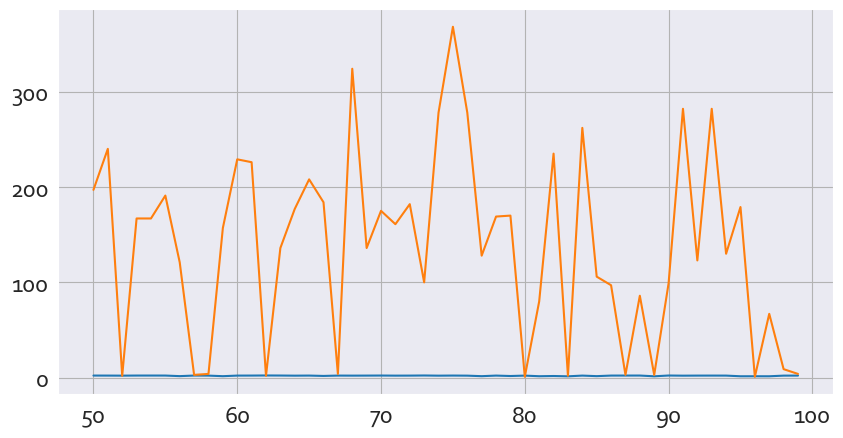

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])